# Predicting the Sale Price of Bulldozer using Machine Learning

### 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data

Kaggle dataset - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

1. **Traiin.csv** - Historical bulldozer sales examples up to 2011
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to Nov 2012

### 3. Evaluation

Root Mean Squared Log Error (RMSLE)

### 4. Importing the data and preparing it for modelling

In [2]:
# Import data analysis tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import training and validation set

path = '/content/TrainAndValid.csv'
df = pd.read_csv(path, error_bad_lines=False)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(137971, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137971 entries, 0 to 137970
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   137971 non-null  int64  
 1   SalePrice                 137971 non-null  int64  
 2   MachineID                 137971 non-null  int64  
 3   ModelID                   137971 non-null  int64  
 4   datasource                137971 non-null  int64  
 5   auctioneerID              137971 non-null  int64  
 6   YearMade                  137971 non-null  int64  
 7   MachineHoursCurrentMeter  26981 non-null   float64
 8   UsageBand                 24055 non-null   object 
 9   saledate                  137971 non-null  object 
 10  fiModelDesc               137971 non-null  object 
 11  fiBaseModel               137971 non-null  object 
 12  fiSecondaryDesc           98264 non-null   object 
 13  fiModelSeries             11731 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    110990
UsageBand                   113916
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              39707
fiModelSeries               126240
fiModelDescriptor           116409
ProductSize                  72524
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                 96820
Enclosure                       54
Forks                        70566
Pad_Type                    107699
Ride_Control                 80696
Stick                       107699
Transmission                 63603
Turbocharged                107699
Blade_Extension     

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

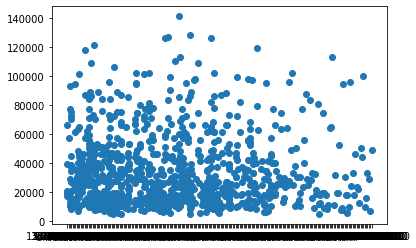

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [9]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [10]:
df.saledate.dtype

dtype('O')

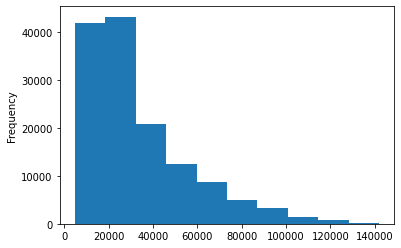

In [11]:
df.SalePrice.plot.hist()

### Parsing dates

In [12]:
# Importing data again but this time parse date

df = pd.read_csv(path, low_memory=False, parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

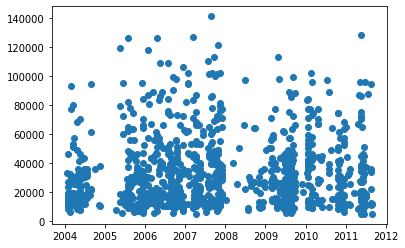

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [18]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [19]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head()

28927    1989-01-31
63166    1989-01-31
63167    1989-01-31
66337    1989-01-31
113547   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe

In [20]:
df_tmp = df.copy()

### Add datatime parameters for the saledate column

In [21]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDatOfYear'] = df_tmp['saledate'].dt.dayofyear

In [22]:
df_tmp.head().T

,28927,63166,63167,66337,113547
SalesID,1259973,1329619,1329620,1338469,1449754
SalePrice,7700,27500,26500,50000,11000
MachineID,1150485,436674,1253848,1505032,1486544
ModelID,6788,4089,4089,23944,3356
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1978,1987,1987,1984,1967
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [23]:
# remove saledate

df_tmp.drop(columns=['saledate'], inplace=True, axis=1)

In [24]:
df_tmp.state.value_counts()

Florida           19391
Texas             17859
California         8979
Washington         4743
Georgia            4641
Pennsylvania       4497
Mississippi        4485
Ohio               4243
New Jersey         3989
Illinois           3925
Tennessee          3859
Maryland           3679
Colorado           3595
North Carolina     3585
Alabama            3572
South Carolina     3171
New York           3092
Arizona            2921
Louisiana          2676
Kentucky           2561
Minnesota          2506
Missouri           2350
Connecticut        2287
Maine              2189
Nevada             2153
Indiana            1851
Unspecified        1659
New Mexico         1308
Arkansas           1268
Wisconsin          1078
New Hampshire      1072
Utah               1005
Oregon              884
Virginia            875
Wyoming             831
Idaho               746
Oklahoma            610
West Virginia       544
Iowa                538
Kansas              478
Montana             455
Michigan        

In [25]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear
28927,1259973,7700,1150485,6788,132,18,1978,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
63166,1329619,27500,436674,4089,132,99,1987,NaN,NaN,D3B,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,1989,1,31,1,31
63167,1329620,26500,1253848,4089,132,99,1987,NaN,NaN,D3B,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
66337,1338469,50000,1505032,23944,132,99,1984,NaN,NaN,215B,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
113547,1449754,11000,1486544,3356,132,99,1967,NaN,NaN,12F,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


In [26]:
len(df_tmp)

137971

### 5. Modelling

Some model driven EDA

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
#model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137971 entries, 28927 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   137971 non-null  int64  
 1   SalePrice                 137971 non-null  int64  
 2   MachineID                 137971 non-null  int64  
 3   ModelID                   137971 non-null  int64  
 4   datasource                137971 non-null  int64  
 5   auctioneerID              137971 non-null  int64  
 6   YearMade                  137971 non-null  int64  
 7   MachineHoursCurrentMeter  26981 non-null   float64
 8   UsageBand                 24055 non-null   object 
 9   fiModelDesc               137971 non-null  object 
 10  fiBaseModel               137971 non-null  object 
 11  fiSecondaryDesc           98264 non-null   object 
 12  fiModelSeries             11731 non-null   object 
 13  fiModelDescriptor         21562 non-null 

In [29]:
df_tmp['UsageBand'].dtype

dtype('O')

In [30]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    110990
UsageBand                   113916
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              39707
fiModelSeries               126240
fiModelDescriptor           116409
ProductSize                  72524
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                 96820
Enclosure                       54
Forks                        70566
Pad_Type                    107699
Ride_Control                 80696
Stick                       107699
Transmission                 63603
Turbocharged                107699
Blade_Extension             127095
Blade_Width         

### Convert string to categories

In [31]:
df_tmp.head().T

,28927,63166,63167,66337,113547
SalesID,1259973,1329619,1329620,1338469,1449754
SalePrice,7700,27500,26500,50000,11000
MachineID,1150485,436674,1253848,1505032,1486544
ModelID,6788,4089,4089,23944,3356
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1978,1987,1987,1984,1967
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,580,D3B,D3B,215B,12F


In [32]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [33]:
# Find columns which contain strings

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Turn string values into category values

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()


In [35]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137971 entries, 28927 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   137971 non-null  int64   
 1   SalePrice                 137971 non-null  int64   
 2   MachineID                 137971 non-null  int64   
 3   ModelID                   137971 non-null  int64   
 4   datasource                137971 non-null  int64   
 5   auctioneerID              137971 non-null  int64   
 6   YearMade                  137971 non-null  int64   
 7   MachineHoursCurrentMeter  26981 non-null   float64 
 8   UsageBand                 24055 non-null   category
 9   fiModelDesc               137971 non-null  category
 10  fiBaseModel               137971 non-null  category
 11  fiSecondaryDesc           98264 non-null   category
 12  fiModelSeries             11731 non-null   category
 13  fiModelDescriptor         

In [36]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df_tmp.state.cat.codes

28927      9
63166      8
63167      8
66337      8
113547     8
          ..
23968      4
23970      4
23971     43
23967     10
23972     43
Length: 137971, dtype: int8

In [38]:
# Check missing data %

df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.804444
UsageBand                   0.825652
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.287792
fiModelSeries               0.914975
fiModelDescriptor           0.843721
ProductSize                 0.525647
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.701742
Enclosure                   0.000391
Forks                       0.511455
Pad_Type                    0.780592
Ride_Control                0.584877
Stick                       0.780592
Transmission                0.460988
Turbocharged                0.780592
B

### Save processed data

In [39]:
# df_tmp.to_csv('train.csv', index=False)

### Fill missing values

In [40]:
# Fill numerical missing values first

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDatOfYear


In [41]:
# check for which numerical columns have null values

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

MachineHoursCurrentMeter


In [42]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column that tells us if the data was missing
      df_tmp[label+'is_missing'] = pd.isnull(content)
      # Replace null with meadian
      df_tmp[label] = content.fillna(content.median())

In [43]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             113916
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                        39707
fiModelSeries                         126240
fiModelDescriptor                     116409
ProductSize                            72524
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                           96820
Enclosure                                 54
Forks                                  70566
Pad_Type  

In [44]:
# Filling and turning categorical values into numbers

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [45]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label] = le.fit_transform(df_tmp[label])

In [46]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDatOfYear,MachineHoursCurrentMeteris_missing
28927,1259973,7700,1150485,6788,132,18,1978,2589.0,3,649,...,10,7,3,3,1989,1,31,1,31,True
63166,1329619,27500,436674,4089,132,99,1987,2589.0,3,1269,...,4,5,3,3,1989,1,31,1,31,True
63167,1329620,26500,1253848,4089,132,99,1987,2589.0,3,1269,...,5,5,3,3,1989,1,31,1,31,True
66337,1338469,50000,1505032,23944,132,99,1984,2589.0,3,187,...,10,7,3,3,1989,1,31,1,31,True
113547,1449754,11000,1486544,3356,132,99,1967,2589.0,3,50,...,10,7,3,3,1989,1,31,1,31,True


### Instantiating RandomForest model

In [47]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
# Score the model

model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9873393183413027

### Splitting data into train/validation sets

In [49]:
df_tmp.saleYear

28927     1989
63166     1989
63167     1989
66337     1989
113547    1989
          ... 
23968     2011
23970     2011
23971     2011
23967     2011
23972     2011
Name: saleYear, Length: 137971, dtype: int64

In [50]:
df_tmp.saleYear.value_counts()

2006    9723
2005    9714
2004    9477
2001    9015
2002    8521
2000    8394
2003    7285
1998    6521
2009    6348
1999    6166
2011    6156
2010    5897
2007    5195
1997    5027
1996    4770
1995    4728
2008    4687
1994    4564
1993    3755
1992    3273
1991    3222
1989    2852
1990    2681
Name: saleYear, dtype: int64

In [51]:
df_val = df_tmp[df_tmp['saleYear'] == 2011]
df_train = df_tmp[df_tmp['saleYear'] != 2012]

In [52]:
len(df_val), len(df_train)

(6156, 137971)

In [53]:
X_train, y_train = df_train.drop('saleYear', axis=1), df_train['saleYear']
X_val, y_val = df_val.drop('saleYear', axis=1), df_val['saleYear']

In [54]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((137971, 57), (137971,), (6156, 57), (6156,))

### Building an evaluation function

In [55]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):

  return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_val, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_val, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_val, val_preds)}

  return scores

### Testing our model on a subset (to tune hyperparameters)

In [56]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [57]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [58]:
(X_train.shape[0] * 100) / 1000000

13.7971

In [59]:
show_scores(model)

{'Training MAE': 1.769583825586535,
 'Valid MAE': 1.3695402858999348,
 'Training RMSLE': 0.0012669707427109954,
 'Valid RMSLE': 0.0013970921387874693,
 'Training R^2': 0.809406441334777,
 'Valid R^2': 0.0}

### Hyperparameter tuning with RandomizedSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [63]:
show_scores(rs_model)

{'Training MAE': 2.1948530397481143,
 'Valid MAE': 1.6926605396552166,
 'Training RMSLE': 0.0015286740848756163,
 'Valid RMSLE': 0.001681604147744989,
 'Training R^2': 0.722580609712536,
 'Valid R^2': 0.0}

### Train a model with best Hyperparameters

In [65]:
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_split=14,
                                    min_samples_leaf=9,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=9,
                      min_samples_split=14, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [66]:
show_scores(rs_model)

{'Training MAE': 2.1948530397481143,
 'Valid MAE': 1.6926605396552115,
 'Training RMSLE': 0.0015286740848756166,
 'Valid RMSLE': 0.0016816041477449896,
 'Training R^2': 0.7225806097125361,
 'Valid R^2': 0.0}

In [67]:
show_scores(ideal_model)

{'Training MAE': 1.3509996770725072,
 'Valid MAE': 1.0551929500534825,
 'Training RMSLE': 0.0010001700643818313,
 'Valid RMSLE': 0.0011328503258870818,
 'Training R^2': 0.881194038687571,
 'Valid R^2': 0.0}